In [ ]:
!nvidia-smi

Sat Apr  5 13:21:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P0             29W /   70W |    6568MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip uninstall ultralytics


Found existing installation: ultralytics 8.2.40
Uninstalling ultralytics-8.2.40:
  Would remove:
    /usr/local/bin/ultralytics
    /usr/local/bin/yolo
    /usr/local/lib/python3.11/dist-packages/tests/*
    /usr/local/lib/python3.11/dist-packages/ultralytics-8.2.40.dist-info/*
    /usr/local/lib/python3.11/dist-packages/ultralytics/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/tests/conversion_test.py
    /usr/local/lib/python3.11/dist-packages/tests/database_test.py
    /usr/local/lib/python3.11/dist-packages/tests/graph_entities_test.py
    /usr/local/lib/python3.11/dist-packages/tests/graph_server_test.py
    /usr/local/lib/python3.11/dist-packages/tests/magics_test.py
    /usr/local/lib/python3.11/dist-packages/tests/node_expansion_test.py
    /usr/local/lib/python3.11/dist-packages/tests/sample_notebook_test.py
    /usr/local/lib/python3.11/dist-packages/tests/schema_manager_test.py
    /usr/local/lib/python3.11/dist-packages/tests/se

In [ ]:
#pip uninstall ultralytics
!pip install ultralytics==8.2.40

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content/drive/My Drive/Prototype


In [ ]:
%cd "/content/drive/MyDrive/Prototype"

/content/drive/MyDrive/Prototype


In [ ]:
!ls

ai_test  data.yaml   linear_regression_model.pkl  runs	      yolov8n.pt
Dataset  Evaluation  reg_data.csv		  yolo11n.pt  yolov8s-seg.pt


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
#model = YOLO('yolov8s-seg.pt')

# Train the model
#model.train(data='data.yaml', epochs=100, imgsz=640, save=True)

In [ ]:
#!ls runs/segment/train/

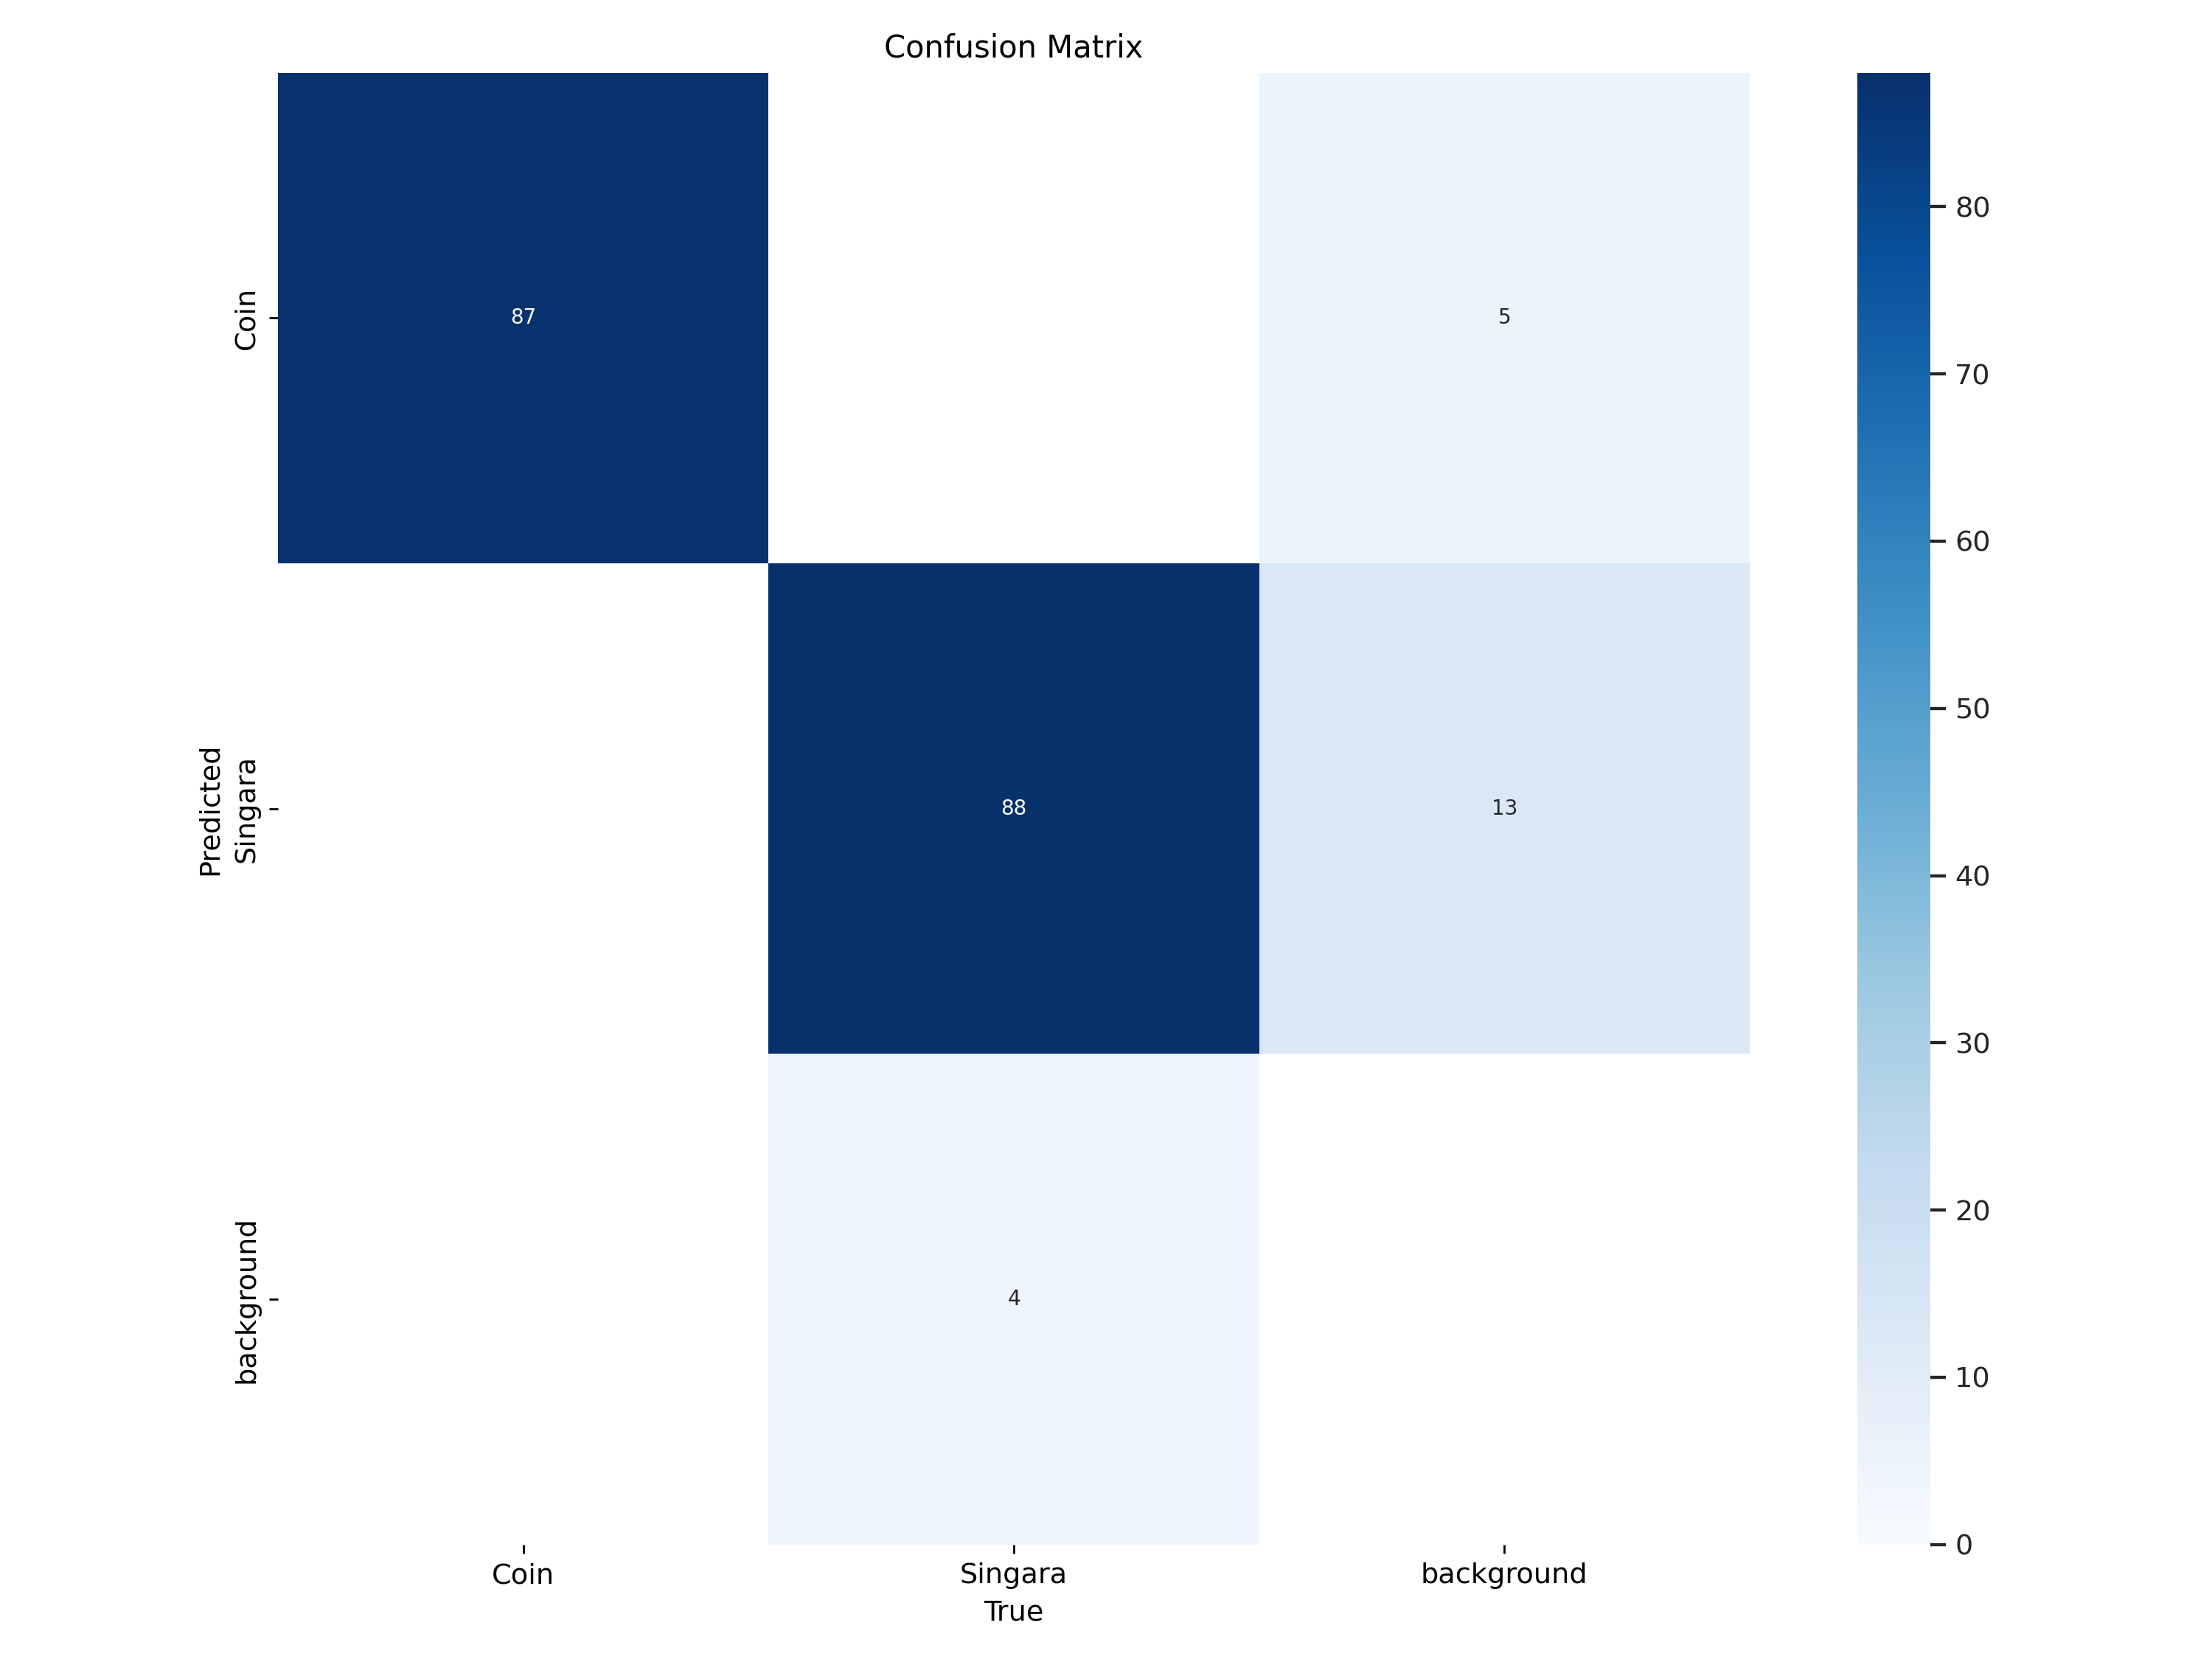

In [ ]:
from IPython.display import display, Image
Image(filename=f'runs/segment/train/confusion_matrix.png', width=800)

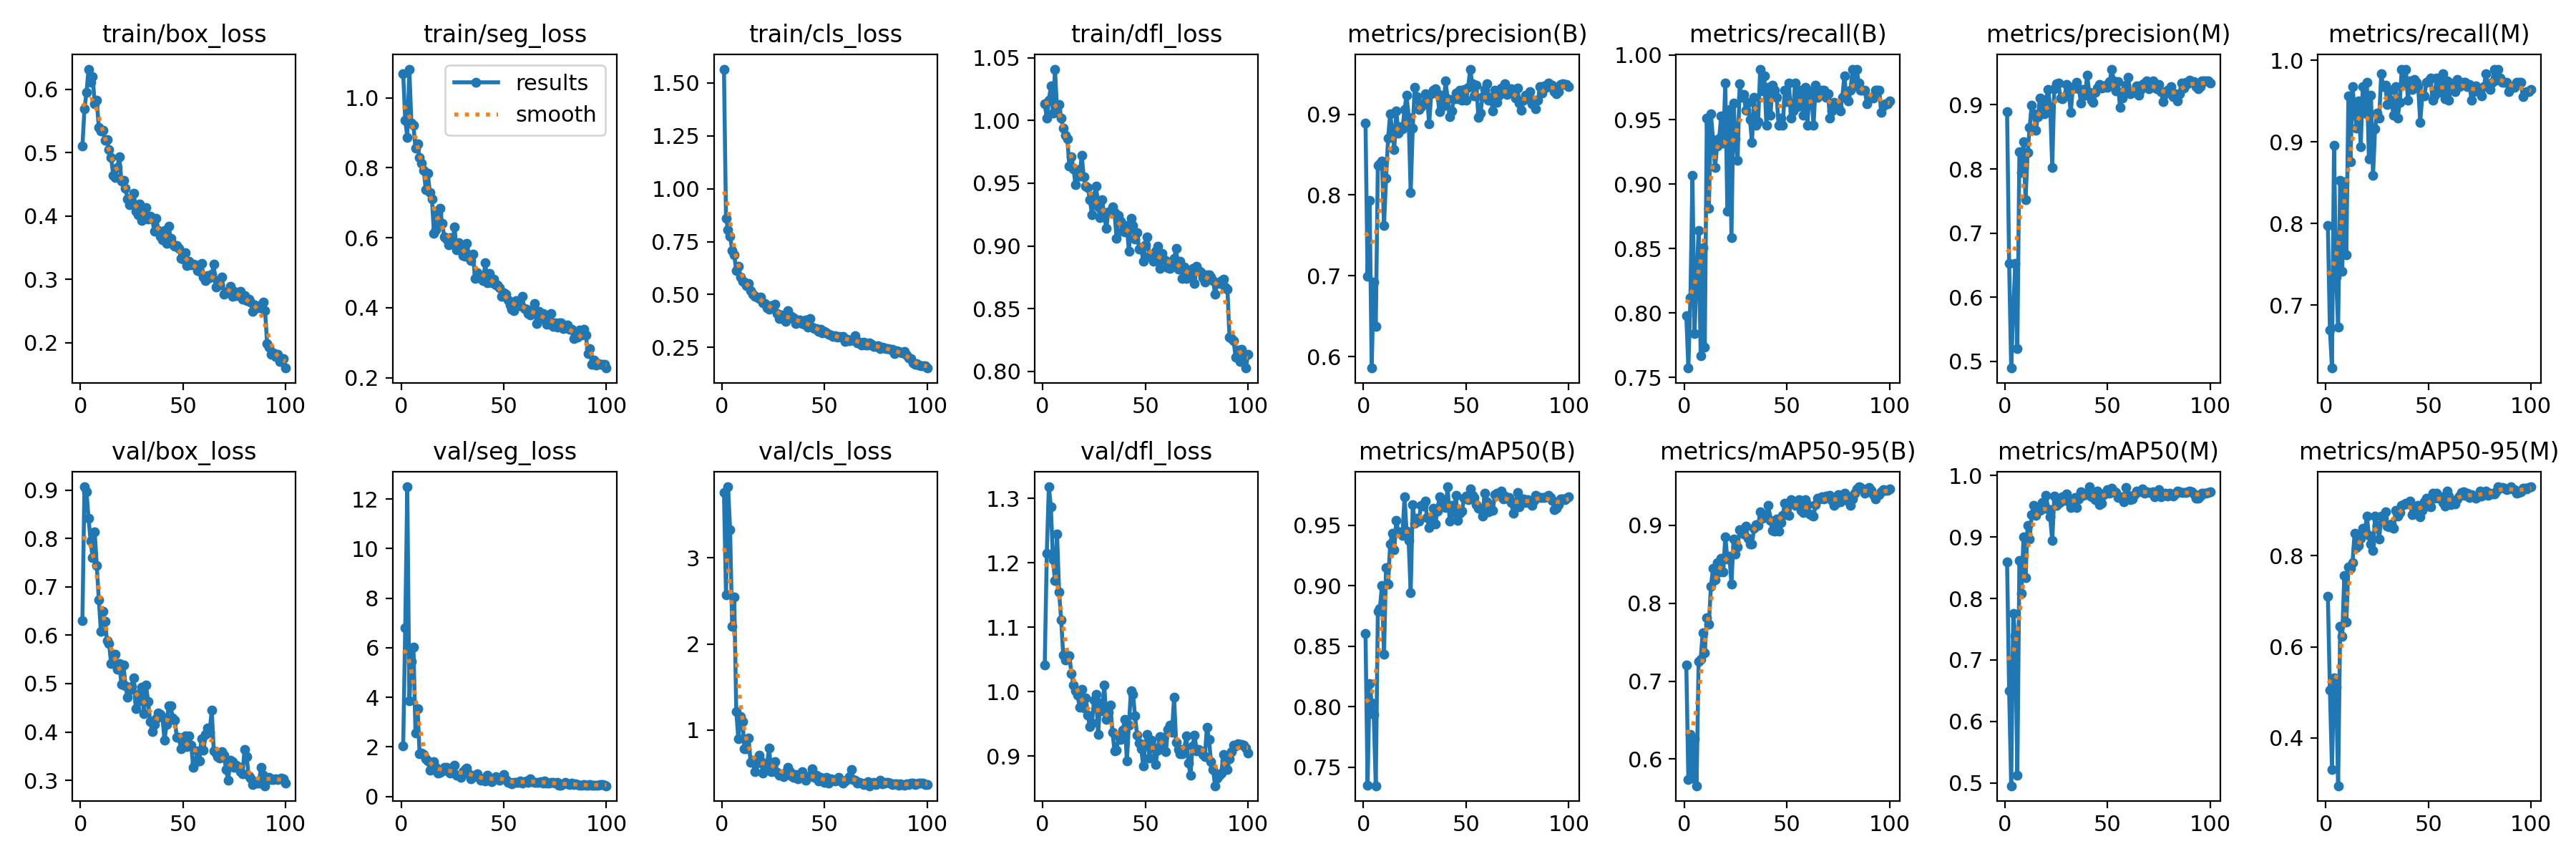

In [ ]:
Image(filename=f'runs/segment/train/results.png',height=400,width=1000)

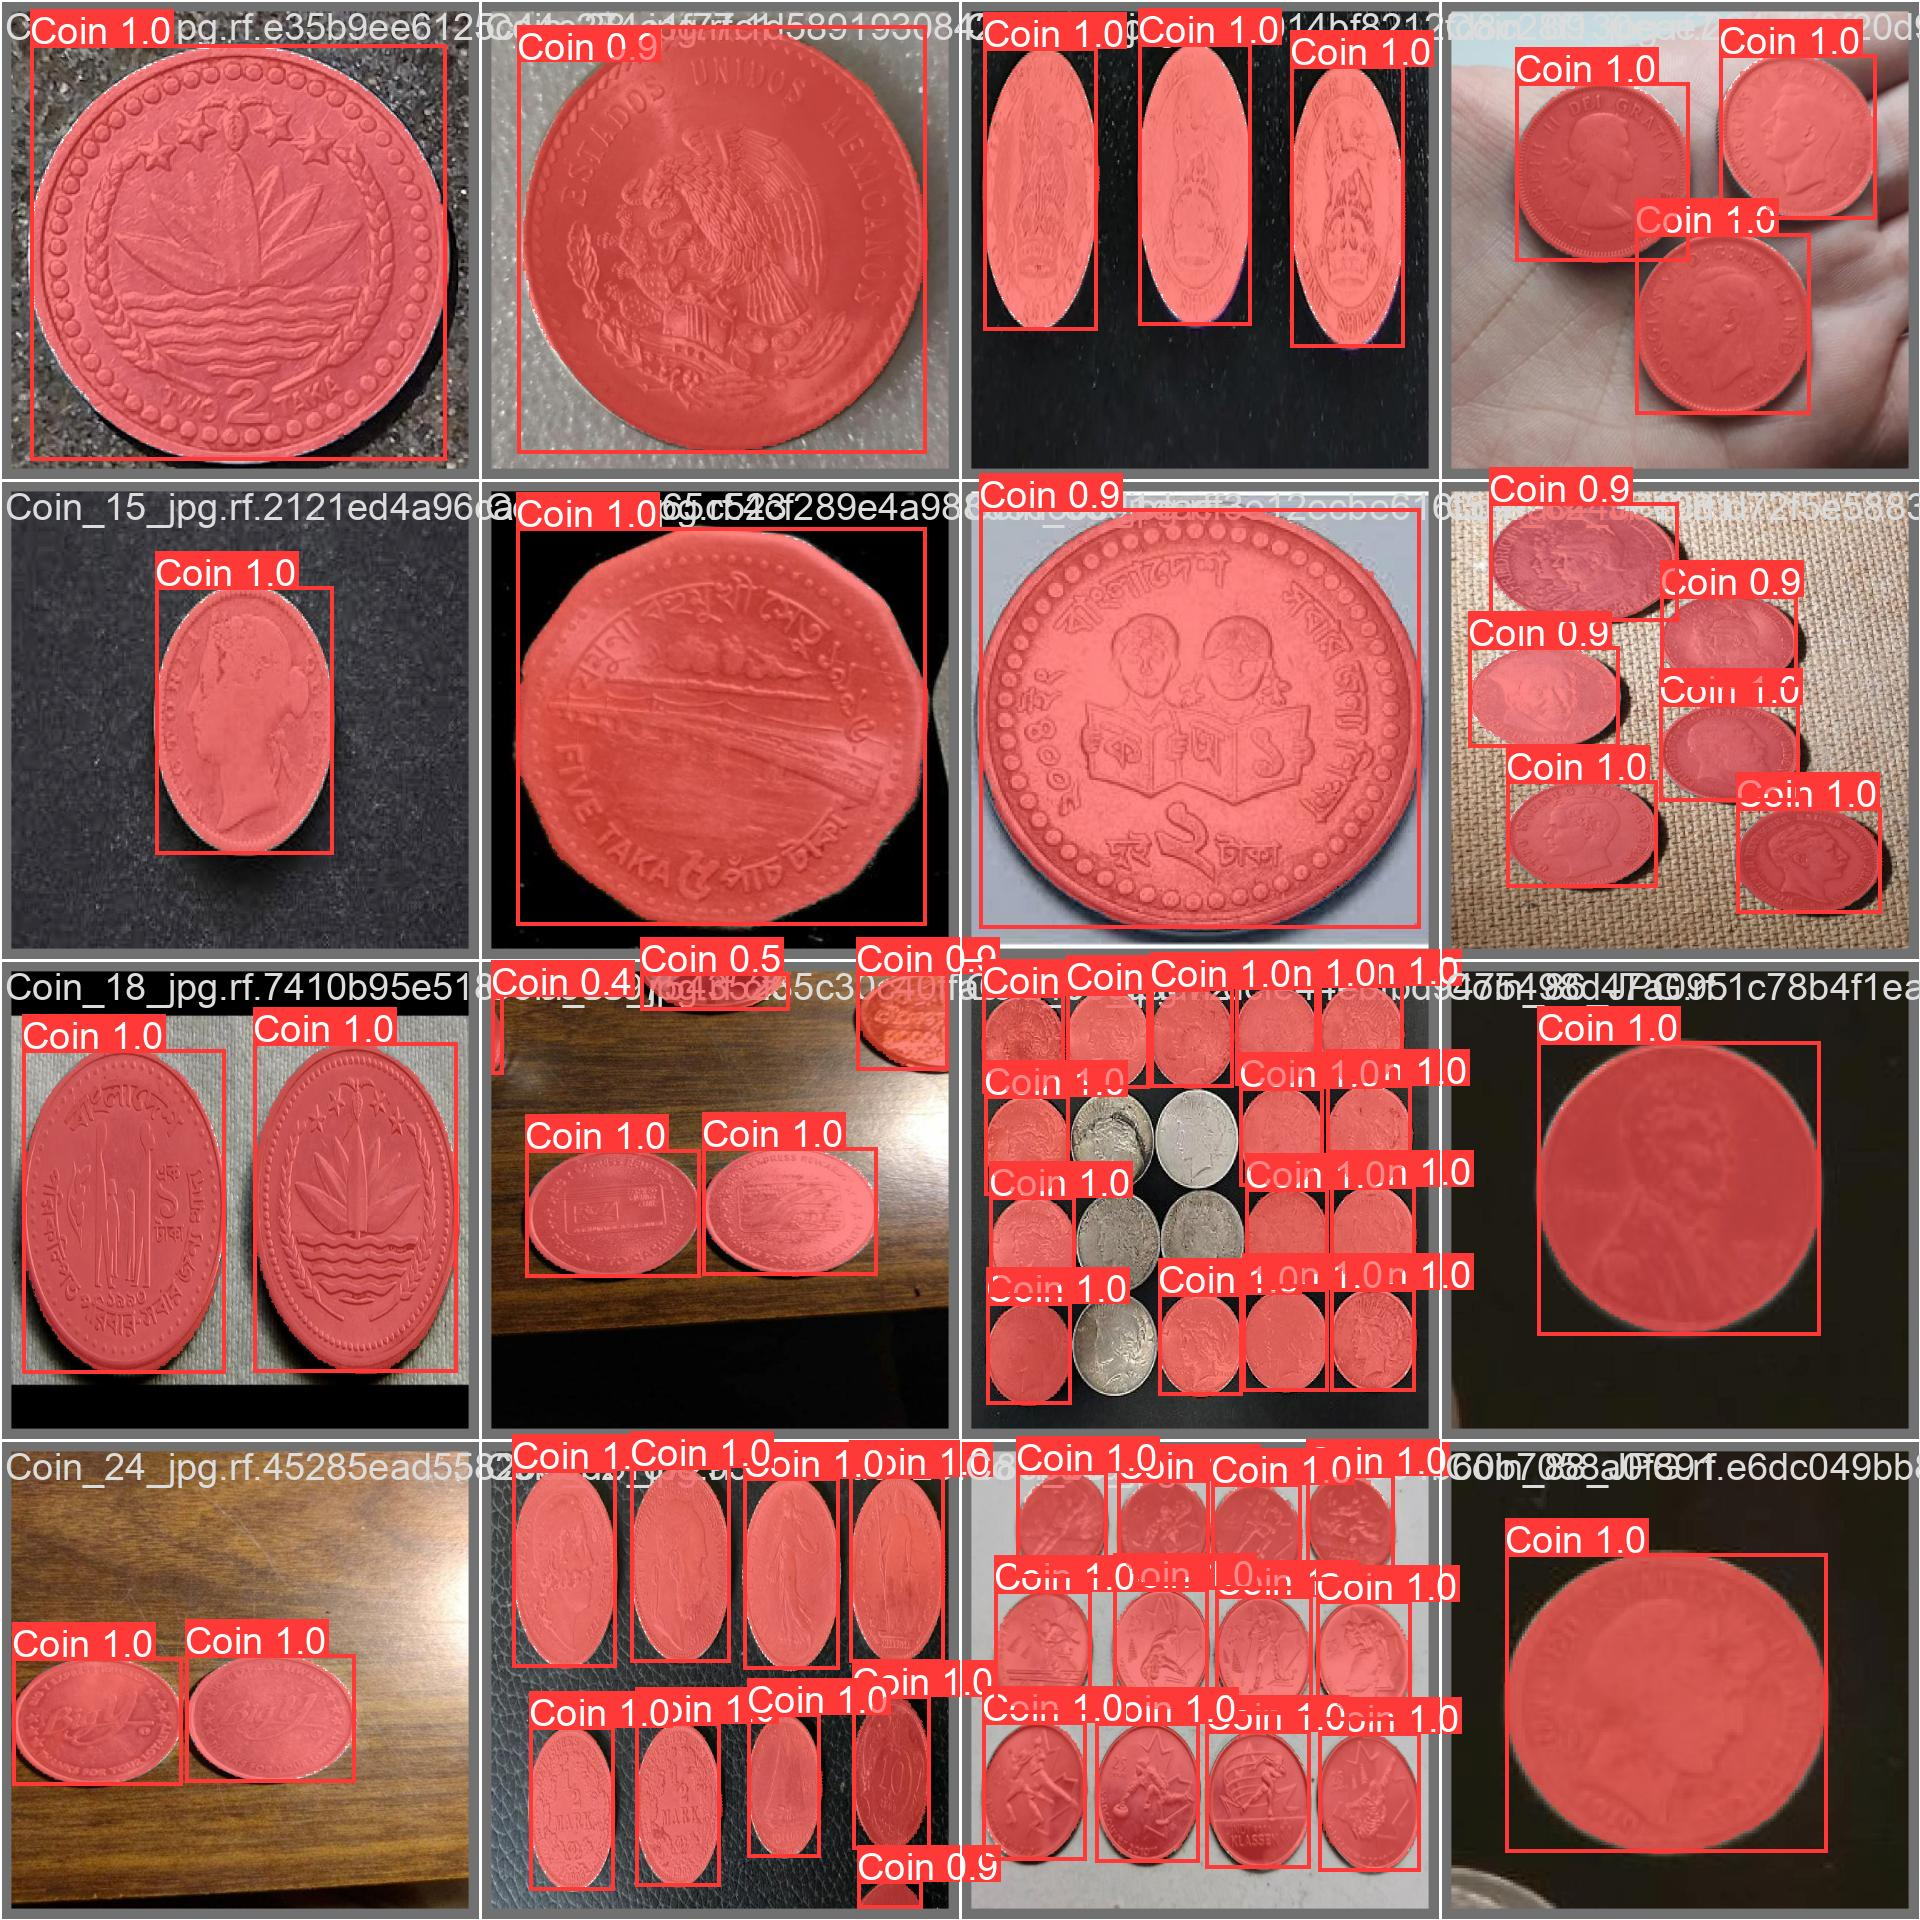

In [ ]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=800)

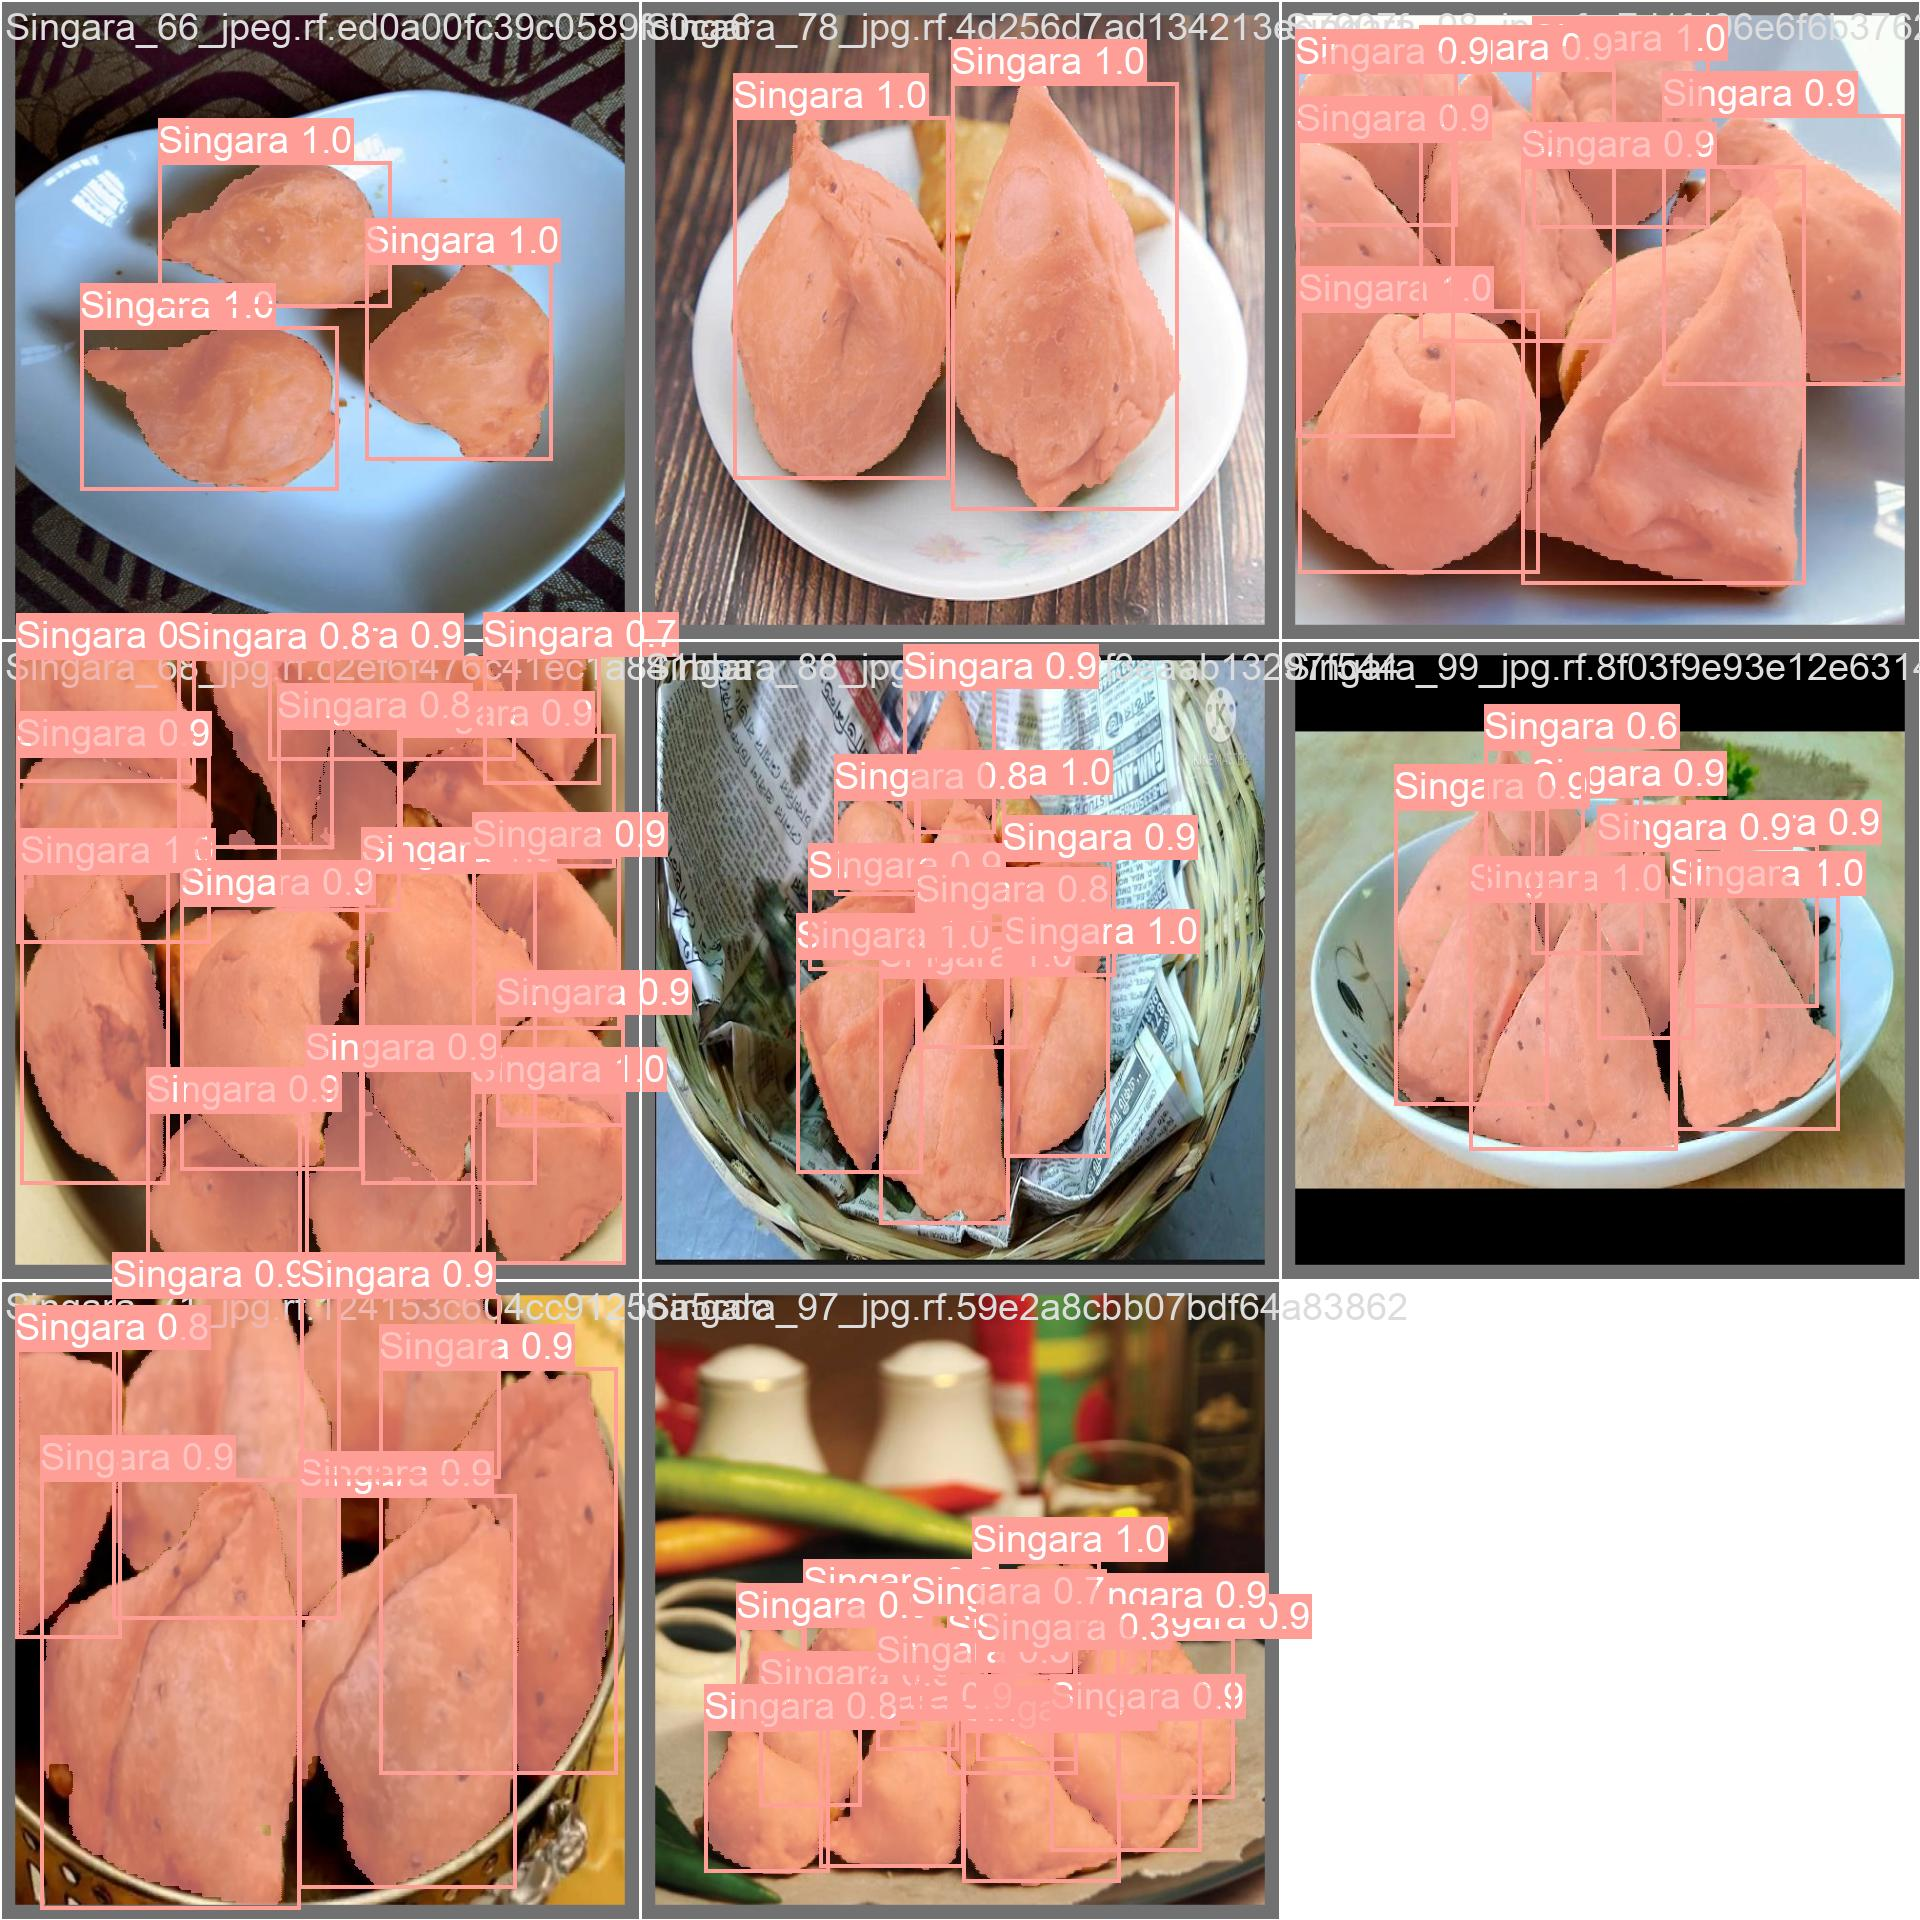

In [ ]:
Image(filename=f'runs/segment/train/val_batch1_pred.jpg', width=800)

In [ ]:
# Load the trained YOLOv8 segmentation model
model = YOLO('runs/segment/train/weights/best.pt')  # Path to your best model after training

# Perform testing on the test dataset
#results = model.val(data='data.yaml', split='test', imgsz=640, conf=0.9)

# Print results
#print(results)

In [ ]:
#model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
#outputs = model.predict(source="/content/drive/MyDrive/Prototype/coin_test.jpg", conf=0.9)
#outputs = model.predict(source="/content/drive/MyDrive/Prototype/singara_test.jpg", conf=0.9)


image 1/1 /content/drive/MyDrive/Prototype/Evaluation/3.jpg: 640x384 1 Coin, 1 Singara, 22.5ms
Speed: 2.3ms preprocess, 22.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 384)


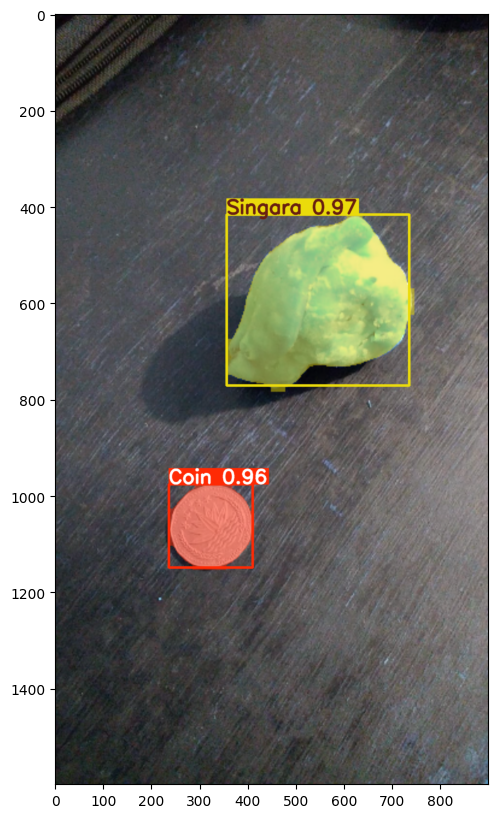

In [ ]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
results = model.predict(source="/content/drive/MyDrive/Prototype/Evaluation/3.jpg", conf=0.9)
result = results[0].plot()
plt.figure(figsize=(10,10))
plt.imshow(result)

In [ ]:
new_result = results[0]
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Coin', 1: 'Singara'}
obb: None
orig_img: array([[[ 25,  26,  22],
        [ 21,  22,  18],
        [ 17,  18,  14],
        ...,
        [  7,   5,  17],
        [  5,   5,  19],
        [  4,   4,  18]],

       [[ 23,  24,  20],
        [ 20,  21,  17],
        [ 16,  17,  13],
        ...,
        [  9,  10,  20],
        [  8,   8,  20],
        [  7,   7,  21]],

       [[ 21,  22,  18],
        [ 18,  19,  15],
        [ 15,  16,  14],
        ...,
        [ 10,  11,  21],
        [  8,  10,  20],
        [  7,   9,  20]],

       ...,

       [[ 36,  49,  33],
        [ 36,  49,  33],
        [ 29,  42,  28],
        ...,
        [ 82, 140, 189],
        [ 85, 138, 189],
        [ 85, 138, 189]],

       [[ 41,  55,  37],
        [ 35,  49,  31],
        [ 25,  38,  22],
        ...,
        [ 77, 13

In [ ]:
new_result.masks.xyn


[array([[    0.67231,     0.25937],
        [    0.67231,     0.26406],
        [    0.66675,     0.26719],
        [    0.66397,     0.26719],
        [    0.66119,     0.26875],
        [    0.65841,     0.26875],
        [    0.65563,     0.27031],
        [    0.65285,     0.27031],
        [    0.65007,     0.27187],
        [    0.64451,     0.27187],
        [    0.64174,     0.27344],
        [    0.63062,     0.27344],
        [    0.62784,       0.275],
        [    0.60005,       0.275],
        [    0.59727,     0.27656],
        [    0.58615,     0.27656],
        [    0.58337,     0.27812],
        [    0.58059,     0.27812],
        [    0.57782,     0.27969],
        [    0.57226,     0.27969],
        [    0.56948,     0.28125],
        [     0.5667,     0.28125],
        [    0.56392,     0.28281],
        [    0.56114,     0.28281],
        [    0.55836,     0.28437],
        [     0.5528,     0.28437],
        [    0.55002,     0.28594],
        [    0.54725,     0.

In [ ]:
extracted_masks = new_result.masks.data


In [ ]:
#extracted_masks.shape


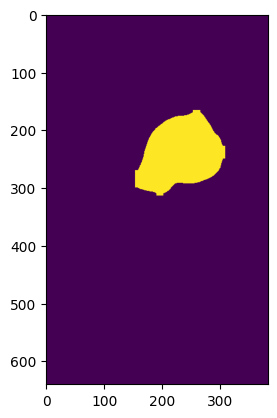

In [ ]:
masks_array = extracted_masks.cpu().numpy()
plt.imshow(masks_array[0])


In [ ]:
class_names = new_result.names.values()
class_names

dict_values(['Coin', 'Singara'])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())


In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: Coin, Number of Masks: 1
Class Name: Singara, Number of Masks: 1


In [ ]:
#TEST
#singara_masks = masks_by_class['Singara']
#binary_mask = (singara_masks[1] > 0.5) * 255
#plt.imshow(binary_mask, cmap='gray')

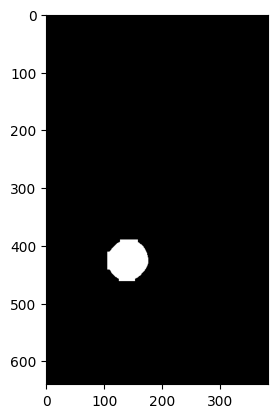

Class: Coin 0
{'Area': np.uint64(4019), 'Width': 71, 'Height': 72, 'Perimeter': 242.1665, 'Scale Factor': 0.3567}


In [ ]:
import cv2
import numpy as np

def analyze_binary_mask_coin(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    known_diameter = 25.5 #Diameter of 5Tk Coin BD
    scale_factor_w = known_diameter/width
    scale_factor_h = known_diameter/height
    scale_factor = (scale_factor_w+scale_factor_h)/2

    return {
        "Area": round(area,4),
        "Width": round(width,4),
        "Height": round(height,4),
        "Perimeter": round(perimeter,4),
        "Scale Factor": round(scale_factor,4)
    }


################################################

for class_name, masks in masks_by_class.items():
  if class_name == "Coin":
    coin_mask = masks_by_class["Coin"]
    if len(coin_mask)>0:
      coin_binary_mask = (coin_mask[0] > 0.5) * 255
      plt.imshow(coin_binary_mask, cmap='gray')
      plt.show()
      print(f"Class: {class_name} {0}")
      result = analyze_binary_mask_coin(coin_binary_mask)
      print(result)
      scale_factor = result['Scale Factor']


In [ ]:
scale_factor

0.3567

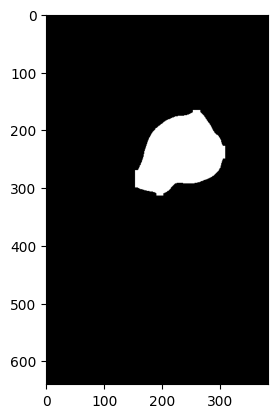

Food Name: Singara 0
{'Scaled Area': np.float64(5387.2401), 'Scaled Width': 55.6452, 'Scaled Height': 52.7916, 'Scaled Perimeter': 182.9371}


In [ ]:
import cv2
import numpy as np

def analyze_binary_mask_food(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    return {
        "Scaled Area": round(area*scale_factor,4),
        "Scaled Width": round(width*scale_factor,4),
        "Scaled Height": round(height*scale_factor,4),
        "Scaled Perimeter": round(perimeter*scale_factor,4)
    }


################################################
for class_name, masks in masks_by_class.items():
  if class_name != "Coin":
    food_mask = masks_by_class[class_name]
    if len(food_mask)>0:
      for i in range(0,len(food_mask)):
            binary_mask = (food_mask[i] > 0.5) * 255
            plt.imshow(binary_mask, cmap='gray')
            plt.show()
            print(f"Food Name: {class_name} {i}")
            result = analyze_binary_mask_food(binary_mask)
            print(result)


In [ ]:
#TEST
#if len(singara_masks)>0:
  #for i in range(0,len(singara_masks)):
    #binary_mask = (singara_masks[i] > 0.5) * 255
    #plt.imshow(binary_mask, cmap='gray')
    #plt.show()

**REGRESSION**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Prototype/reg_data.csv")
df.head(5)

ID    Width   Height        Area  Perimeter  Weight
0   1  52.8264  49.6248   5119.7586   173.5288    36.2
1   2  56.5656  64.2096   7004.5794   201.9607    40.1
2   3  55.8752  52.9344   5491.5764   182.5565    35.5
3   4  88.8060  71.6680  11491.4185   270.4846    45.3
4   5  49.1064  47.7792   5749.4304   164.4556    33.3

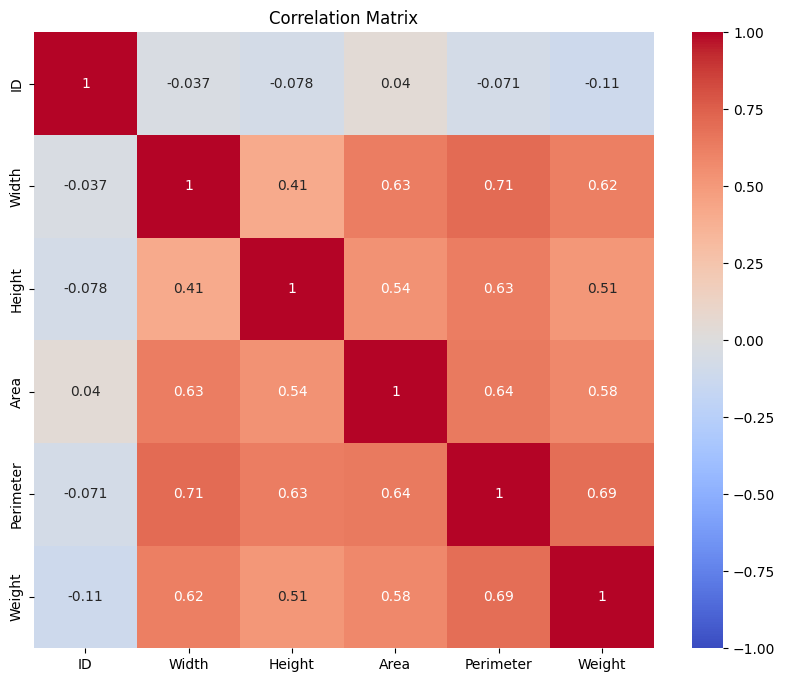

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df[['Width', 'Height', 'Area', 'Perimeter']]
y = df['Weight']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 1.5038046378486063
Mean Squared Error: 3.126220859074929
R-squared: 0.45423966603386856


In [ ]:
import joblib

# Save the model to the '/content' directory
file_path = '/content/drive/MyDrive/Prototype/linear_regression_model.pkl'
joblib.dump(model, file_path)


['/content/drive/MyDrive/Prototype/linear_regression_model.pkl']

In [ ]:
import joblib

file_path = '/content/drive/MyDrive/Prototype/linear_regression_model.pkl'
loaded_model = joblib.load(file_path)

**TESTING DONT TOUCH**


image 1/1 /content/drive/MyDrive/Prototype/Evaluation/3.jpg: 640x384 1 Coin, 1 Singara, 52.4ms
Speed: 16.5ms preprocess, 52.4ms inference, 16.9ms postprocess per image at shape (1, 3, 640, 384)
Class Name: Coin, Number of Masks: 1
Class Name: Singara, Number of Masks: 1


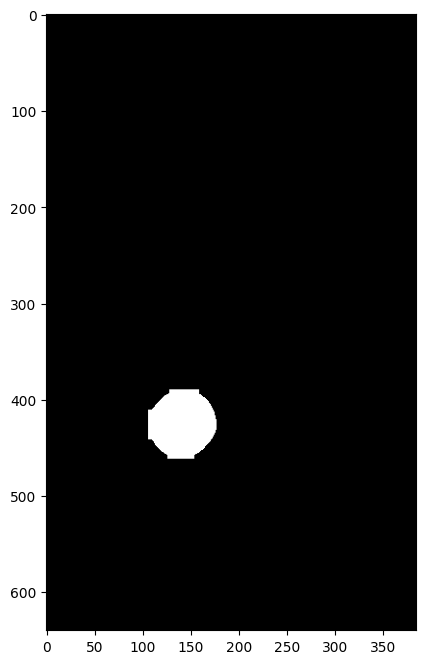

Class: Coin 0
{'Width': 71, 'Height': 72, 'Area': np.uint64(4019), 'Perimeter': 242.1665, 'Scale Factor': 0.3567}


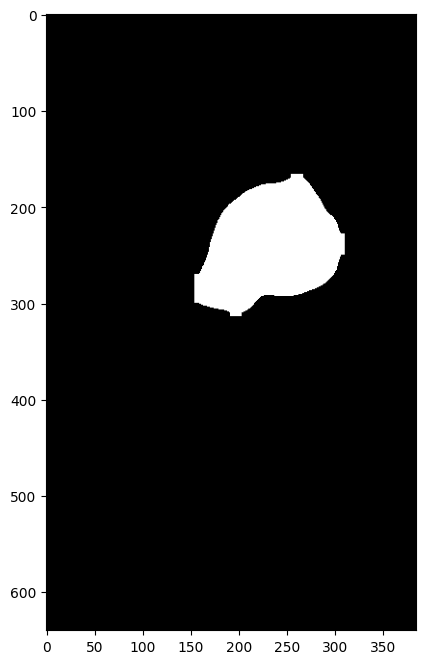

Food Name: Singara 0
{'Scaled Width': 55.6452, 'Scaled Height': 52.7916, 'Scaled Area': np.float64(5387.2401), 'Scaled Perimeter': 182.9371}
     Width   Height       Area  Perimeter
0  55.6452  52.7916  5387.2401   182.9371
Predicted value for the single data point: 35.7962
35.7962
Calories in Singara_0 is 67.1179 kcal


In [ ]:
model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
results = model.predict(source="/content/drive/MyDrive/Prototype/Evaluation/3.jpg", conf=0.9)
###################################
new_result = results[0]
class_names = new_result.names.values()
class_names
extracted_masks = new_result.masks.data

# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


#################################################COIN
import cv2
import numpy as np
import pandas as pd
import joblib
file_path = '/content/drive/MyDrive/Prototype/linear_regression_model.pkl'
loaded_model = joblib.load(file_path)
def analyze_binary_mask_coin(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    known_diameter = 25.5 #Diameter of 5Tk Coin BD
    scale_factor_w = known_diameter/width
    scale_factor_h = known_diameter/height
    scale_factor = (scale_factor_w+scale_factor_h)/2

    return {
        "Width": round(width,4),
        "Height": round(height,4),
        "Area": round(area,4),
        "Perimeter": round(perimeter,4),
        "Scale Factor": round(scale_factor,4)
    }


################################################

for class_name, masks in masks_by_class.items():
  if class_name == "Coin":
    coin_mask = masks_by_class["Coin"]
    if len(coin_mask)>0:
      coin_binary_mask = (coin_mask[0] > 0.5) * 255
      plt.figure(figsize=(8, 8))
      plt.imshow(coin_binary_mask, cmap='gray')
      plt.show()
      print(f"Class: {class_name} {0}")
      result = analyze_binary_mask_coin(coin_binary_mask)
      print(result)
      scale_factor = result['Scale Factor']

######################################################################FOOD
import cv2
import numpy as np

def analyze_binary_mask_food(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    return {
        "Scaled Width": round(width*scale_factor,4),
        "Scaled Height": round(height*scale_factor,4),
        "Scaled Area": round(area*scale_factor,4),
        "Scaled Perimeter": round(perimeter*scale_factor,4)
    }

density = {"Singara": 1.875}

################################################
for class_name, masks in masks_by_class.items():
  if class_name != "Coin":
    food_mask = masks_by_class[class_name]
    if len(food_mask)>0:
      for i in range(0,len(food_mask)):
            binary_mask = (food_mask[i] > 0.5) * 255
            plt.figure(figsize=(8, 8))
            plt.imshow(binary_mask, cmap='gray')
            plt.show()
            print(f"Food Name: {class_name} {i}")
            result = analyze_binary_mask_food(binary_mask)
            print(result)
            single_data_point_df = pd.DataFrame([result])
            single_data_point_df.columns = ['Width', 'Height', 'Area', 'Perimeter']
            print(single_data_point_df)
            weight_prediction = loaded_model.predict(single_data_point_df)
            weight = round(weight_prediction[0],4)
            print(f'Predicted value for the single data point: {weight}')
            value = density.get(class_name)
            print(weight)
            print(f'Calories in {class_name}_{i} is {round(weight*value,4)} kcal')






image 1/1 /content/drive/MyDrive/Prototype/Evaluation/16.jpg: 640x384 1 Coin, 1 Singara, 51.6ms
Speed: 5.7ms preprocess, 51.6ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 384)
Class Name: Coin, Number of Masks: 1
Class Name: Singara, Number of Masks: 1


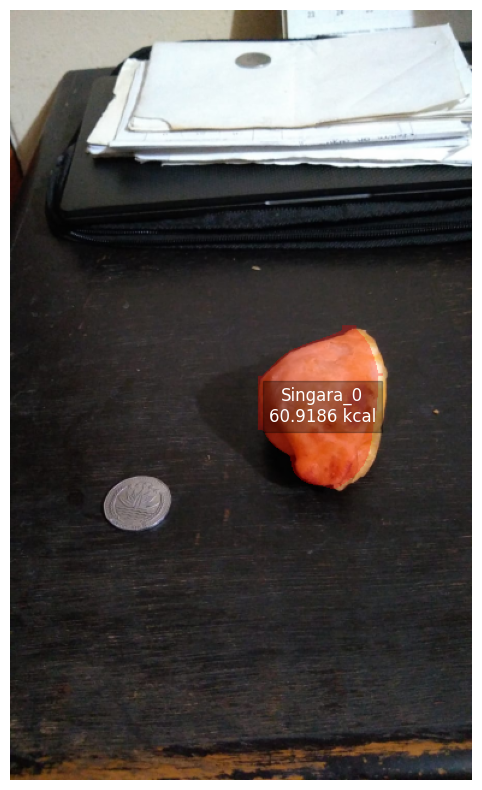

In [ ]:
model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
results = model.predict(source="/content/drive/MyDrive/Prototype/Evaluation/16.jpg", conf=0.9)
###################################
new_result = results[0]
class_names = new_result.names.values()
class_names
extracted_masks = new_result.masks.data

# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


#################################################COIN
import cv2
import numpy as np

def analyze_binary_mask_coin(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    known_diameter = 25.5 #Diameter of 5Tk Coin BD
    scale_factor_w = known_diameter/width
    scale_factor_h = known_diameter/height
    scale_factor = (scale_factor_w+scale_factor_h)/2

    return {
        "Width": round(width,4),
        "Height": round(height,4),
        "Area": round(area,4),
        "Perimeter": round(perimeter,4),
        "Scale Factor": round(scale_factor,4)
    }


################################################

for class_name, masks in masks_by_class.items():
  if class_name == "Coin":
    coin_mask = masks_by_class["Coin"]
    if len(coin_mask)>0:
      coin_binary_mask = (coin_mask[0] > 0.5) * 255
      #plt.imshow(coin_binary_mask, cmap='gray')
      #plt.show()
      #print(f"Class: {class_name} {0}")
      result = analyze_binary_mask_coin(coin_binary_mask)
      #print(result)
      #scale_factor = result['Scale Factor']

######################################################################FOOD
import cv2
import numpy as np

def analyze_binary_mask_food(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    return {
        "Scaled Width": round(width*scale_factor,4),
        "Scaled Height": round(height*scale_factor,4),
        "Scaled Area": round(area*scale_factor,4),
        "Scaled Perimeter": round(perimeter*scale_factor,4)
    }

density = {"Singara": 1.875}

orig_img = plt.imread('/content/drive/MyDrive/Prototype/Evaluation/16.jpg')

for masks in masks_by_class.values():
    if len(masks) > 0:
        target_shape = masks[0].shape
        break

##################################################
from skimage.transform import resize
# Resize the original image to match the mask dimensions
resized_img = resize(orig_img, target_shape, anti_aliasing=True)
plt.figure(figsize=(10, 10))
plt.imshow(resized_img)

################################################
for class_name, masks in masks_by_class.items():
    if class_name != "Coin":
        food_mask = masks_by_class[class_name]
        if len(food_mask) > 0:
            for i in range(len(food_mask)):
                mask = food_mask[i]

                # Create an RGBA version of the mask
                rgba_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
                rgba_mask[..., 0] = 255  # Red channel
                rgba_mask[..., 3] = (mask > 0.5) * 255  # Alpha channel for transparency

                #plt.imshow(resized_img)  # Ensure the resized original image is displayed first
                plt.imshow(rgba_mask, alpha=0.3)  # Overlay the mask with transparency

                binary_mask = (mask > 0.5) * 255
                result = analyze_binary_mask_food(binary_mask)
                single_data_point_df = pd.DataFrame([result])
                single_data_point_df.columns = ['Width', 'Height', 'Area', 'Perimeter']
                weight_prediction = loaded_model.predict(single_data_point_df)
                weight = round(weight_prediction[0], 4)
                value = density.get(class_name)
                calories = round(weight * value, 4)

                # Calculate the centroid of the mask
                y_indices, x_indices = np.where(mask > 0.5)
                if len(y_indices) > 0 and len(x_indices) > 0:
                    centroid_x = np.mean(x_indices)
                    centroid_y = np.mean(y_indices)
                    plt.text(centroid_x, centroid_y, f'{class_name}_{i}\n{calories} kcal', color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.3))

plt.axis('off')  # Optionally remove the axes for better visualization
plt.show()


image 1/1 /content/drive/MyDrive/Prototype/Evaluation/40.jpg: 384x640 1 Coin, 1 Singara, 35.3ms
Speed: 10.6ms preprocess, 35.3ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)
Class Name: Coin, Number of Masks: 1
Class Name: Singara, Number of Masks: 1


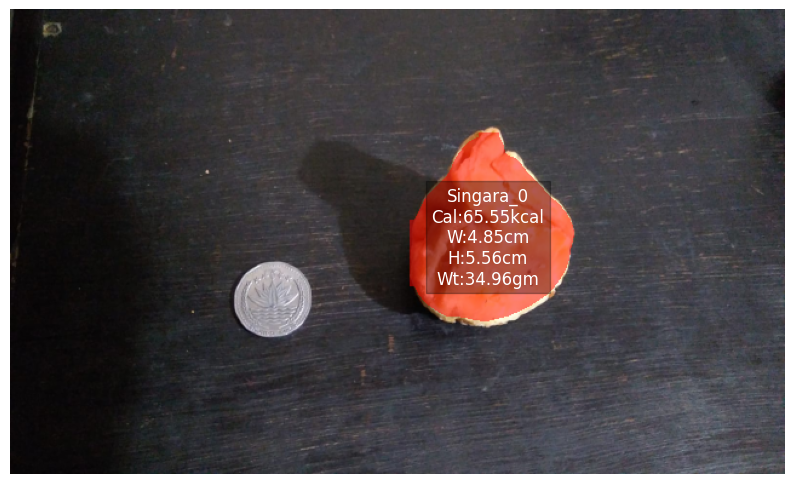

In [ ]:
file_path = "/content/drive/MyDrive/Prototype/Evaluation/40.jpg"

model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
results = model.predict(source=file_path, conf=0.9)
###################################
new_result = results[0]
class_names = new_result.names.values()
class_names
extracted_masks = new_result.masks.data

# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")


#################################################COIN
import cv2
import numpy as np

def analyze_binary_mask_coin(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    known_diameter = 25.5 #Diameter of 5Tk Coin BD
    scale_factor_w = known_diameter/width
    scale_factor_h = known_diameter/height
    scale_factor = (scale_factor_w+scale_factor_h)/2

    return {
        "Width": round(width,4),
        "Height": round(height,4),
        "Area": round(area,4),
        "Perimeter": round(perimeter,4),
        "Scale Factor": round(scale_factor,4)
    }


################################################

for class_name, masks in masks_by_class.items():
  if class_name == "Coin":
    coin_mask = masks_by_class["Coin"]
    if len(coin_mask)>0:
      coin_binary_mask = (coin_mask[0] > 0.5) * 255
      #plt.imshow(coin_binary_mask, cmap='gray')
      #plt.show()
      #print(f"Class: {class_name} {0}")
      result = analyze_binary_mask_coin(coin_binary_mask)
      #print(result)
      #scale_factor = result['Scale Factor']

######################################################################FOOD
import cv2
import numpy as np

def analyze_binary_mask_food(binary_mask):


    # Check if the input is a valid binary mask
    if binary_mask is None:
        raise ValueError("Input binary mask is None.")

    if len(binary_mask.shape) != 2:
        raise ValueError("Input binary mask must be a 2D array.")

    # Ensure the mask contains only 0 and 1 values
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Ensure at least one contour is found
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    # Get the bounding rectangle for the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)

    # Calculate the perimeter of the largest contour
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate the area by summing the values in the binary mask
    area = np.sum(binary_mask)

    return {
        "Scaled Width": round(width*scale_factor,4),
        "Scaled Height": round(height*scale_factor,4),
        "Scaled Area": round(area*scale_factor,4),
        "Scaled Perimeter": round(perimeter*scale_factor,4)
    }

density = {"Singara": 1.875}

# Load the image from the specified path
orig_img = plt.imread(file_path)

# Get the dimensions of the mask (assuming all masks are of the same size)
for masks in masks_by_class.values():
    if len(masks) > 0:
        target_shape = masks[0].shape
        break

# Resize the original image to match the mask dimensions
resized_img = resize(orig_img, target_shape, anti_aliasing=True)
plt.figure(figsize=(10, 10))
plt.imshow(resized_img)

################################################
# Define the RGB color manually
mask_color = (255, 0, 0)  # Red color

for class_name, masks in masks_by_class.items():
    if class_name != "Coin":
        food_mask = masks_by_class[class_name]
        if len(food_mask) > 0:
            for i in range(len(food_mask)):
                mask = food_mask[i]

                # Create an RGBA version of the mask
                rgba_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)

                # Set the mask color manually
                rgba_mask[..., 0] = mask_color[0]  # Red channel
                rgba_mask[..., 1] = mask_color[1]  # Green channel
                rgba_mask[..., 2] = mask_color[2]  # Blue channel
                rgba_mask[..., 3] = (mask > 0.5) * 255  # Alpha channel for transparency (semi-transparent)

                plt.imshow(rgba_mask, alpha=0.5)  # Overlay the mask with transparency

                binary_mask = (mask > 0.5) * 255
                result = analyze_binary_mask_food(binary_mask)

                width_food = round(result["Scaled Width"]/10,2)
                height_food = round(result["Scaled Height"]/10,2)

                single_data_point_df = pd.DataFrame([result])
                single_data_point_df.columns = ['Width', 'Height', 'Area', 'Perimeter']
                weight_prediction = loaded_model.predict(single_data_point_df)
                weight = round(weight_prediction[0], 2)
                value = density.get(class_name)
                calories = round(weight * value, 2)

                # Calculate the centroid of the mask
                y_indices, x_indices = np.where(mask > 0.5)
                if len(y_indices) > 0 and len(x_indices) > 0:
                    centroid_x = np.mean(x_indices)
                    centroid_y = np.mean(y_indices)
                    plt.text(centroid_x, centroid_y, f'{class_name}_{i}\nCal:{calories}kcal\nW:{width_food}cm\nH:{height_food}cm\nWt:{weight}gm', color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.3))

plt.axis('off')  # Optionally remove the axes for better visualization
plt.show()


image 1/1 /content/drive/MyDrive/Prototype/Evaluation/3.jpg: 640x384 1 Coin, 1 Singara, 24.6ms
Speed: 3.7ms preprocess, 24.6ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 384)


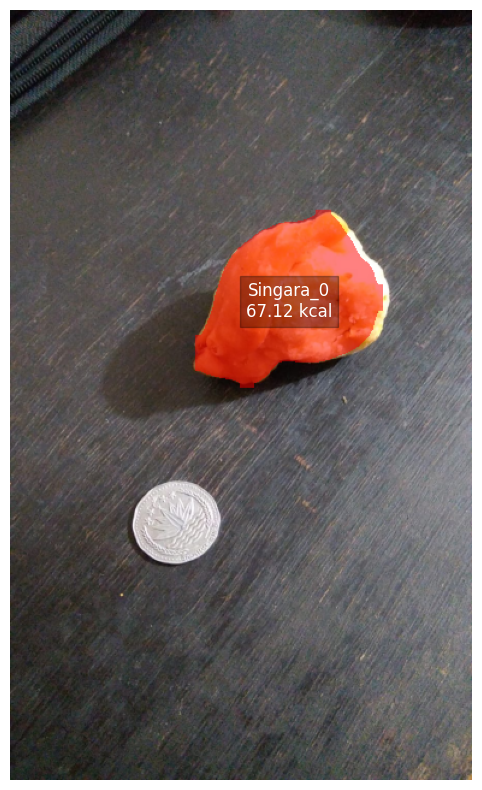

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.transform import resize
from ultralytics import YOLO

# Load YOLO model and perform predictions
model = YOLO("/content/drive/MyDrive/Prototype/runs/segment/train/weights/best.pt")
file_path = "/content/drive/MyDrive/Prototype/Evaluation/3.jpg"
results = model.predict(source=file_path, conf=0.9)
new_result = results[0]

# Extract class names and masks
class_names = new_result.names.values()
extracted_masks = new_result.masks.data
detected_boxes = new_result.boxes.data
class_labels = detected_boxes[:, -1].int().tolist()
masks_by_class = {name: [] for name in class_names}

for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]
    masks_by_class[class_name].append(mask.cpu().numpy())

# Function to analyze a binary mask for a coin
def analyze_binary_mask_coin(binary_mask):
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    area = np.sum(binary_mask)

    known_diameter = 25.5  # Diameter of 5Tk Coin BD
    scale_factor = ((known_diameter / width) + (known_diameter / height)) / 2

    return {
        "Width": round(width, 4),
        "Height": round(height, 4),
        "Area": round(area, 4),
        "Perimeter": round(perimeter, 4),
        "Scale Factor": round(scale_factor, 4)
    }

# Function to analyze a binary mask for food
def analyze_binary_mask_food(binary_mask, scale_factor):
    binary_mask = binary_mask.astype(np.uint8)
    binary_mask[binary_mask > 0] = 1
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        raise ValueError("No contours found in the binary mask.")

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, width, height = cv2.boundingRect(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    area = np.sum(binary_mask)

    return {
        "Scaled Width": round(width * scale_factor, 4),
        "Scaled Height": round(height * scale_factor, 4),
        "Scaled Area": round(area * scale_factor, 4),
        "Scaled Perimeter": round(perimeter * scale_factor, 4)
    }

# Process and analyze detected masks
density = {"Singara": 1.875}
orig_img = plt.imread(file_path)

# Resize the original image to match the mask dimensions
for masks in masks_by_class.values():
    if len(masks) > 0:
        target_shape = masks[0].shape
        break
resized_img = resize(orig_img, target_shape, anti_aliasing=True)

plt.figure(figsize=(10, 10))
plt.imshow(resized_img)

# Analyze coin masks
coin_mask = masks_by_class.get("Coin")
if coin_mask:
    coin_binary_mask = (coin_mask[0] > 0.5) * 255
    result = analyze_binary_mask_coin(coin_binary_mask)
    scale_factor = result['Scale Factor']

# Analyze food masks
for class_name, masks in masks_by_class.items():
    if class_name != "Coin":
        for i, mask in enumerate(masks):
            rgba_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
            rgba_mask[..., 0] = 255  # Red channel
            rgba_mask[..., 3] = (mask > 0.5) * 255  # Alpha channel

            plt.imshow(rgba_mask, alpha=0.5)

            binary_mask = (mask > 0.5) * 255
            result = analyze_binary_mask_food(binary_mask, scale_factor)
            width_food = round(result["Scaled Width"] / 10, 2)
            height_food = round(result["Scaled Height"] / 10, 2)

            single_data_point_df = pd.DataFrame([result])
            single_data_point_df.columns = ['Width', 'Height', 'Area', 'Perimeter']
            weight_prediction = loaded_model.predict(single_data_point_df)
            weight = round(weight_prediction[0], 2)
            value = density.get(class_name, 1)
            calories = round(weight * value, 2)

            y_indices, x_indices = np.where(mask > 0.5)
            if y_indices.size > 0 and x_indices.size > 0:
                centroid_x = np.mean(x_indices)
                centroid_y = np.mean(y_indices)
                #plt.text(centroid_x, centroid_y, f'{class_name}_{i}\nCal:{calories}kcal\nW:{width_food}cm\nH:{height_food}cm\nWt:{weight}gm',color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.3))
                plt.text(centroid_x, centroid_y, f'{class_name}_{i}\n{calories} kcal', color='white', fontsize=12, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.3))


plt.axis('off')
plt.show()
